In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [503]:
import numpy as np
import luminosity_analytic as l
import luminosity_numerical_no_SG as ln
import luminosity_numerical_SG as lsg
from utils.constants import G, kb, mp, Rb, Me, Re, Msun, RH, RHe, sigma, \
    cmperau, RHill, gammafn, mufn, Rfn, Cvfn, kdust, Tdisk, Pdisk, params, yr, kconst, kdust
from utils.parameters import FT, FSigma, mstar, Y, delad, rhoc, Mc, rc, \
    gamma, Y, a
import profiles_no_SG as atmnoSG
import profiles_SG as atmSG
import evaporation_2 as evap2

import cooling as cool
from scipy.interpolate import interp1d
    
reload(l)
reload(ln)
#reload(atm)
reload(cool)

<module 'cooling' from 'cooling.pyc'>

In [486]:
delad = 2./7
a = 0.1
Mc = 10 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdust)

In [487]:
model, param, prof = atmnoSG.atmload('a01Mc10', prms)
modelSG, paramSG, profSG = atmSG.atmload('a01Mc10', prms)

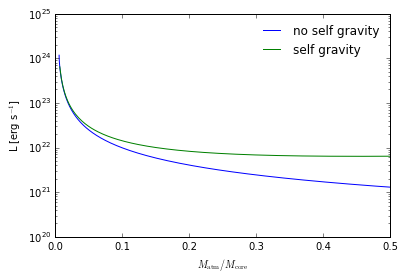

In [488]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (modelSG.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
#plt.ylim(ymin=5e20, ymax = 3e24)
#plt.title(r'a = 0.1 AU, $M_{\rm core}=10 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [427]:
paramSG.MB[154]

14.397034484227733

In [428]:
ind=154

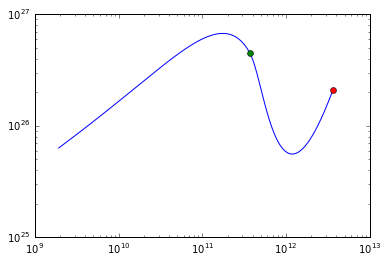

In [429]:
plt.loglog(profSG[ind].r, profSG.rho[ind] * profSG.r[ind]**3)
plt.loglog(paramSG.rcb[ind]*Re, paramSG.Pcb[ind] / (paramSG.Tcb[ind] * modelSG.R) * (paramSG.rcb[ind]*Re)**3, 'o')
plt.loglog(paramSG.RB[ind]*Re, paramSG.PB[ind] / (paramSG.TB[ind] * modelSG.R) * (paramSG.RB[ind]*Re)**3, 'o')

In [332]:
delad = 2./7
a = 0.1
Mc = 4 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdust)

In [337]:
#model, param, prof = atmnoSG.atmload('a10Mc5', prms)
modelSG, paramSG, profSG = atmSG.atmload('a01Mc4', prms)

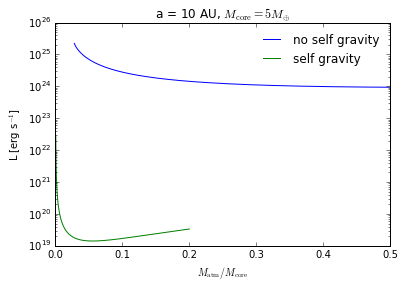

In [326]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (model.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
#plt.ylim(ymin=5e23, ymax = 1e27)
plt.title(r'a = 10 AU, $M_{\rm core}=5 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a60Mc5.pdf')

In [489]:
dt = cool.cooling_global(param, prof, model, out='rcb')[1]
dt2 = cool.cooling_global(param, prof, model, out='rout')[1]
dtSG = cool.cooling_global(paramSG, profSG, modelSG, out='rcb')[1]
dtSG2 = cool.cooling_global(paramSG, profSG, modelSG, out='RB')[1]

time, time2 = [], []
for i in range(len(dt)):
    time = np.append(time, sum(dt[:i + 1]))
for i in range(len(dt2)):
    time2 = np.append(time2, sum(dt2[:i + 1]))

timeSG, timeSG2 = [], []
for i in range(len(dtSG)):
    timeSG = np.append(timeSG, sum(dtSG[:i + 1]))
for i in range(len(dtSG2)):
    timeSG2 = np.append(timeSG2, sum(dtSG2[:i + 1]))

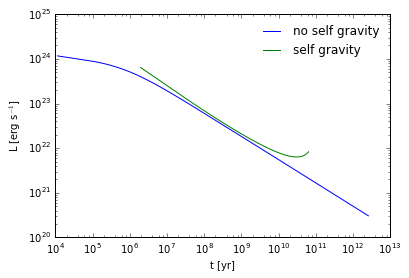

In [492]:
plt.loglog(time / yr, param.L[:-1], label = 'no self gravity')
plt.loglog(timeSG / yr, paramSG.L[:-1], label = 'self gravity')
#plt.loglog(timeSG2 / yr, paramSG.L[:-1], label = 'self gravity')
#plt.xlim(xmin = 1e3, xmax = 1e8)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

#plt.savefig('../figs/comp_L_vs_t.pdf')

In [340]:
timeSG[0]/yr

2167934.464328412

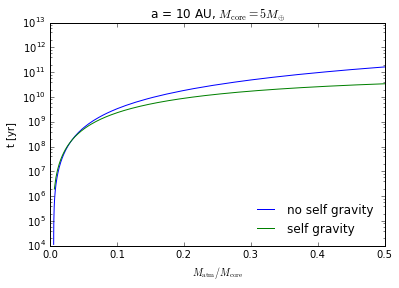

In [83]:
plt.semilogy((param.Mtot[:-1] - model.Mco / Me) / (model.Mco/Me), time/yr, label = 'no self gravity')
plt.semilogy((paramSG.MB[:-1] - modelSG.Mco / Me) / (model.Mco/Me), timeSG/yr, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r't [yr]')
plt.legend(frameon = False, loc = 4)
#plt.ylim(ymin=1e2, ymax = 1e8)
plt.title(r'a = 10 AU, $M_{\rm core}=5 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [25]:
prms2 = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdust)

model2, param2, prof2 = atm.atmload('a01Mc10', prms2)

In [403]:
cneg1 = cool.cooling_local(paramSG, profSG, modelSG, out='rcb', onlyrad = 1)

In [405]:
la = cneg1 / (paramSG.Etotcb[1:]-paramSG.Etotcb[:-1])

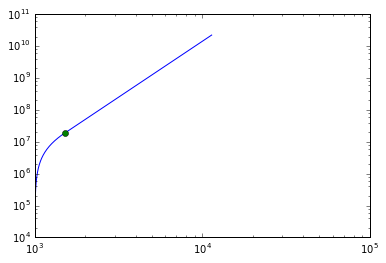

In [108]:
#plt.loglog(prof.t[20], prof.P[20])
#plt.plot(param.Tcb[20], param.Pcb[20], 'o')

plt.loglog(profSG.t[60], profSG.P[60])
plt.plot(paramSG.Tcb[60], paramSG.Pcb[60], 'o')

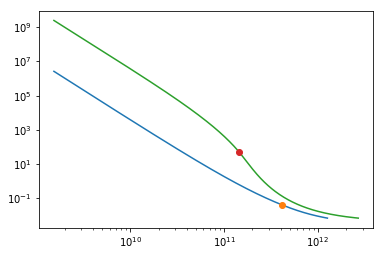

In [86]:
plt.loglog(prof.r[20], prof.P[20])
plt.plot(param.rcb[20]*Re, param.Pcb[20], 'o')

plt.loglog(profSG.r[60], profSG.P[60])
plt.plot(paramSG.rcb[60]*Re, paramSG.Pcb[60], 'o')

In [493]:
f = interp1d(time / yr, param.Mtot[:-1])
f2 = interp1d(time2 / yr, param.Mtot[:-1])
f(3e6), f2(3e6)

(array(10.09022829491766), array(10.087546225898556))

In [109]:
fSG = interp1d(timeSG / yr, paramSG.MB[:-1])
fSG2 = interp1d(timeSG2 / yr, paramSG.MB[:-1])
fSG(3e6), fSG2(3e6)
MBd = float(fSG(3e6))

fMrcbSG = interp1d(paramSG.MB, paramSG.Mcb)
Mrcbd = float(fMrcbSG(MBd))

frcbSG = interp1d(paramSG.MB, paramSG.rcb)
rcbd = float(frcbSG(MBd))

fRBSG = interp1d(paramSG.MB, paramSG.RB)
RBd = float(fRBSG(MBd))

fTcbSG = interp1d(paramSG.MB, paramSG.Tcb)
Tcbd = float(fTcbSG(MBd))

fEtotBSG = interp1d(paramSG.MB, paramSG.EtotB)
EtotBd = float(fEtotBSG(MBd))

fEtotcbSG = interp1d(paramSG.MB, paramSG.Etotcb)
Etotcbd = float(fEtotcbSG(MBd))

fEgBSG = interp1d(paramSG.MB, paramSG.EgB)
EgBd = float(fEgBSG(MBd))


print MBd, Mrcbd, rcbd, RBd, Tcbd, EtotBd, Etotcbd, EgBd

6.03049296187 6.01981511242 24.5354720508 42.7565559929 1357.25647894 -1.60523596865e+37 -1.48312372171e+37 -6.28656779742e+37


In [114]:
(MBd*Me/model.Mco - 1)*100
print RBd*Re/model.rco

[ 14.1521776]


In [111]:
print - G * modelSG.Mco * (MBd * Me - modelSG.Mco) / (RBd * Re) #+ \
    #modelSG.Cv * model.Td * Mrcbd * Me, 
EtotBd

[ -1.59963604e+37]


-1.6052359686542542e+37

In [451]:
a = 1

delad = 2./7
gamma = gammafn(delad)
R = Rfn(Y)
Cv = Cvfn(Y, delad)
Pd = Pdisk(a, mstar, FSigma, FT)
Td = Tdisk(a, FT)
nMco = 9

Mcore = numpy.linspace(2*Me, 10*Me, nMco) 
rcore = (3 * Mcore / (4 * numpy.pi * rhoc))**(1./3)

ratiov, ratiorcbv, RBoverrcv, rcboverrcv, fracmv, fracmrcbv, MBv, RBv = [], [], [], [], [], [], [], []

for i in range(nMco):
    prms = params(Mcore[i], rcore[i], a, delad, Y, gamma, R, Cv, Pd, Td,\
            kappa = kdust)
    model, param, prof = atmSG.atmload('a1Mc' + str(int(Mcore[i]/Me)), prms)
    dt = cool.cooling_global(param, prof, model, out='rcb')[1]
        
    time = []
    
    for i in range(len(dt)):
        time = np.append(time, sum(dt[:i + 1]))
        
    f = interp1d(time / yr, param.MB[:-1])
    MBd = float(f(3e6))
    
    fMrcb = interp1d(param.MB, param.Mcb)
    Mrcbd = float(fMrcb(MBd))
    
    frcb = interp1d(param.MB, param.rcb)
    rcbd = float(frcb(MBd))

    fRB = interp1d(param.MB, param.RB)
    RBd = float(fRB(MBd))
    
    fEtotB = interp1d(param.MB, param.EtotB)
    EtotBd = float(fEtotB(MBd))
    
    Eevap = - G * model.Mco * (MBd * Me - model.Mco) / (RBd * Re)
    Eevaprcb = - G * model.Mco * (Mrcbd * Me - model.Mco) / (rcbd * Re)
    
    ratio = Eevap / EtotBd
    ratiorcb = Eevaprcb / EtotBd
    RBoverrc = RBd*Re/model.rco
    rcboverrc = rcbd*Re/model.rco
    fracm = (MBd*Me/model.Mco - 1)*100
    fracmrcb = (Mrcbd*Me/model.Mco - 1)*100
    
    ratiov = np.append(ratiov, ratio)
    ratiorcbv = np.append(ratiorcbv, ratiorcb)
    RBoverrcv = np.append(RBoverrcv, RBoverrc)
    rcboverrcv = np.append(rcboverrcv, rcboverrc)
    fracmv = np.append(fracmv, fracm)
    fracmrcbv = np.append(fracmrcbv, fracmrcb)
    MBv = np.append(MBv, MBd)
    RBv = np.append(RBv, RBd)
    
    
    


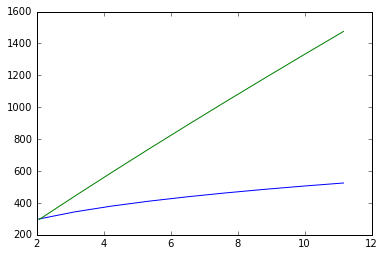

In [237]:
plt.plot(MBv, RBv)
plt.plot(MBv, G * Mcore / (model.R * model.Td) / Re)

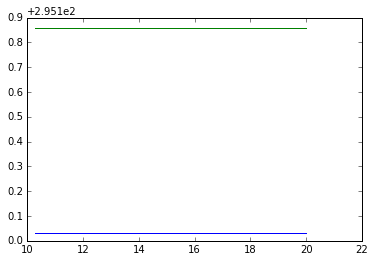

In [263]:
plt.plot(param.MB, np.ones(len(param.MB)) * G * 2*Me / (model.R * model.Td) / Re)
#plt.plot(param.MB, param.RB)
plt.plot(param.MB, np.ones(len(param.MB)) * RHill(2*Me, model.a)/Re)

In [265]:
gamma = model.gamma
exponent = -(3-2*gamma)/(gamma-1)

In [440]:
ratiorcbv, rcboverrcv, RBoverrcv, fracmrcbv, fracmv

(array([ 0.57315346,  0.49642458,  0.45166765,  0.4207092 ,  0.39734698,
         0.3787162 ,  0.36333642,  0.3503106 ,  0.3390813 ]),
 array([ 25.16059802,  34.09214167,  42.09316317,  49.36128741,
         56.01649891,  62.15681827,  67.8444068 ,  73.13622269,  78.07197052]),
 array([ 169.33266834,  170.05235074,  170.70693313,  171.30641417,
         171.8614962 ,  172.37889556,  172.86656701,  173.3295319 ,
         173.77353844]),
 array([ 1.78415618,  2.81703023,  3.83315683,  4.82708668,  5.79863942,
         6.74583535,  7.67153384,  8.57671949,  9.46524552]),
 array([  3.30119215,   4.6239192 ,   5.83675831,   6.95570317,
          7.99873538,   8.97709681,   9.90462032,  10.79005029,  11.64359921]))

In [441]:
ratiov, RBoverrcv, fracmv

(array([ 0.15757563,  0.16335922,  0.16958776,  0.17468307,  0.17864979,
         0.1817267 ,  0.18410586,  0.18595827,  0.18740048]),
 array([ 169.33266834,  170.05235074,  170.70693313,  171.30641417,
         171.8614962 ,  172.37889556,  172.86656701,  173.3295319 ,
         173.77353844]),
 array([  3.30119215,   4.6239192 ,   5.83675831,   6.95570317,
          7.99873538,   8.97709681,   9.90462032,  10.79005029,  11.64359921]))

In [365]:
rcboverrcv/RBoverrcv

array([ 0.52438935,  0.57384117,  0.57384117,  0.61523898,  0.6508856 ,
        0.68210533,  0.70970925])

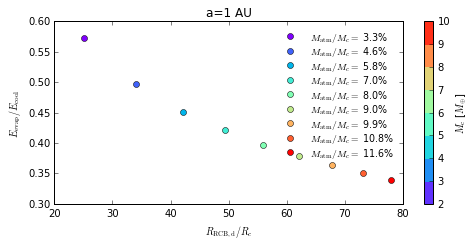

In [452]:
fig = plt.figure(figsize = (7, 3.5))

rnb = np.linspace(0, 256, nMco)
#Z = [[165,175],[0.15,0.19]]
x = np.linspace(20, 80, 100)
y = np.linspace(0.3, 0.6, 100)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)
levels = Mcore/Me
CS = plt.contourf(X, Y, Z, levels, cmap=get_cmap(cm.rainbow))


for i in range(nMco):
    plt.plot(rcboverrcv[i], ratiorcbv[i], 'o', c = cm.rainbow(int(rnb[i])), \
             label = r' $M_{\rm atm}/M_c=$ %.1f' % float(fracmv[i]) + '%')
plt.legend(frameon = False, loc = 1, labelspacing = 0.05, prop = {'size':9.5}, numpoints = 1)
    
cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')
plt.xlabel(r'$R_{\rm RCB,d}/R_c$')
plt.ylabel(r'$E_{\rm evap}/E_{\rm cool}$')


#plt.ylim(0.15, 0.19)
#plt.xlim(168, 175)
plt.title('a=1 AU')

plt.tight_layout()
#plt.savefig('../figs/evap_vs_cool_1au_rcb.pdf')

In [308]:
#a = (ratiov[0] * exponent - ratiov[1] * exponent) / (RBoverrcv[0] - RBoverrcv[1])
#b = (ratiov[1] * exponent * RBoverrcv[0] - ratiov[0] * exponent * RBoverrcv[1]) / (RBoverrcv[0] - RBoverrcv[1])

In [456]:
a = (ratiorcbv[0] - ratiorcbv[1]) / (rcboverrcv[0] * exponent - rcboverrcv[1] * exponent)
b = (ratiorcbv[1] * exponent * rcboverrcv[0] - ratiorcbv[0] * exponent * rcboverrcv[1]) / \
    (rcboverrcv[0] * exponent - rcboverrcv[1] * exponent)

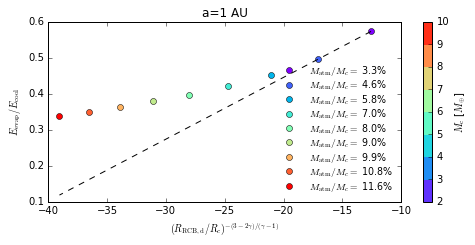

In [463]:
fig = plt.figure(figsize = (7, 3.5))

rnb = np.linspace(0, 256, nMco)
#Z = [[165,175],[0.15,0.19]]
x = np.linspace(-40, -10, 100)
y = np.linspace(0.1, 0.6, 100)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)
levels = Mcore/Me
CS = plt.contourf(X, Y, Z, levels, cmap=get_cmap(cm.rainbow))


for i in range(nMco):
    plt.plot(rcboverrcv[i] * exponent, ratiorcbv[i], 'o', c = cm.rainbow(int(rnb[i])), \
             label = r' $M_{\rm atm}/M_c=$ %.1f' % float(fracmv[i]) + '%')
plt.plot(rcboverrcv * exponent, a * rcboverrcv * exponent + b, c = 'black', ls = '--')
plt.legend(frameon = False, loc = 4, labelspacing = 0.05, prop = {'size':9.5}, numpoints = 1)

    
cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')
plt.xlabel(r'$(R_{\rm RCB,d}/R_c)^{-(3-2\gamma)/(\gamma-1)}$')
plt.ylabel(r'$E_{\rm evap}/E_{\rm cool}$')

#plt.xlim(168.5, 175)
#plt.ylim(-0.097, -0.077)
plt.title('a=1 AU')

plt.tight_layout()
plt.savefig('../figs/evap_vs_cool_1au_analytic_comp_rcb.pdf')


In [479]:
a = 10

delad = 2./7
gamma = gammafn(delad)
R = Rfn(Y)
Cv = Cvfn(Y, delad)
Pd = Pdisk(a, mstar, FSigma, FT)
Td = Tdisk(a, FT)
nMco = 10

Mcore = numpy.linspace(1*Me, 10*Me, nMco) 
rcore = (3 * Mcore / (4 * numpy.pi * rhoc))**(1./3)

ratiov, ratiorcbv, RBoverrcv, rcboverrcv, fracmv, fracmrcbv, MBv, RBv = [], [], [], [], [], [], [], []

for i in range(nMco):
    prms = params(Mcore[i], rcore[i], a, delad, Y, gamma, R, Cv, Pd, Td,\
            kappa = kdust)
    model, param, prof = atmSG.atmload('a10Mc' + str(int(Mcore[i]/Me)), prms)
    dt = cool.cooling_global(param, prof, model, out='rcb')[1]
        
    time = []
    
    for i in range(len(dt)):
        time = np.append(time, sum(dt[:i + 1]))
        
    f = interp1d(time / yr, param.MB[:-1])
    MBd = float(f(3e6))
    
    fMrcb = interp1d(param.MB, param.Mcb)
    Mrcbd = float(fMrcb(MBd))
    
    frcb = interp1d(param.MB, param.rcb)
    rcbd = float(frcb(MBd))

    fRB = interp1d(param.MB, param.RB)
    RBd = float(fRB(MBd))
    
    fEtotB = interp1d(param.MB, param.EtotB)
    EtotBd = float(fEtotB(MBd))
    
    Eevap = - G * model.Mco * (MBd * Me - model.Mco) / (RBd * Re)
    Eevaprcb = - G * model.Mco * (Mrcbd * Me - model.Mco) / (rcbd * Re)
    
    ratio = Eevap / EtotBd
    ratiorcb = Eevaprcb / EtotBd
    RBoverrc = RBd*Re/model.rco
    rcboverrc = rcbd*Re/model.rco
    fracm = (MBd*Me/model.Mco - 1)*100
    fracmrcb = (Mrcbd*Me/model.Mco - 1)*100
    
    ratiov = np.append(ratiov, ratio)
    ratiorcbv = np.append(ratiorcbv, ratiorcb)
    RBoverrcv = np.append(RBoverrcv, RBoverrc)
    rcboverrcv = np.append(rcboverrcv, rcboverrc)
    fracmv = np.append(fracmv, fracm)
    fracmrcbv = np.append(fracmrcbv, fracmrcb)
    MBv = np.append(MBv, MBd)
    RBv = np.append(RBv, RBd)
    
    
    


In [480]:
ratiov, RBoverrcv, fracmv

(array([ 0.0394888 ,  0.03438954,  0.0319533 ,  0.03049481,  0.0295445 ,
         0.02891504,  0.0285208 ,  0.02832564,  0.0283278 ,  0.0285653 ]),
 array([  288.11349223,   468.80974362,   630.91254514,   786.70280797,
          942.16762147,  1101.64140069,  1269.31268004,  1450.2281585 ,
         1651.65048447,  1885.90661777]),
 array([  2.05865824,   4.61554536,   7.44212379,  10.59197922,
         14.13909641,  18.18408748,  22.87292109,  28.42885181,
         35.22056116,  43.92617232]))

In [481]:
ratiorcbv, rcboverrcv, RBoverrcv, fracmrcbv, fracmv

(array([ 0.43186812,  0.3482487 ,  0.3082202 ,  0.28394135,  0.26770189,
         0.25638763,  0.24851482,  0.24340272,  0.24077555,  0.24084074]),
 array([  24.99817748,   43.26212653,   60.32121279,   77.01252463,
          93.76961575,  110.93353743,  128.85082824,  147.93338802,
         168.81632756,  192.56527061]),
 array([  288.11349223,   468.80974362,   630.91254514,   786.70280797,
          942.16762147,  1101.64140069,  1269.31268004,  1450.2281585 ,
         1651.65048447,  1885.90661777]),
 array([  1.95346742,   4.31317863,   6.86346176,   9.65451605,
         12.75059457,  16.23630992,  20.23162753,  24.91924577,
         30.59793798,  37.81571746]),
 array([  2.05865824,   4.61554536,   7.44212379,  10.59197922,
         14.13909641,  18.18408748,  22.87292109,  28.42885181,
         35.22056116,  43.92617232]))

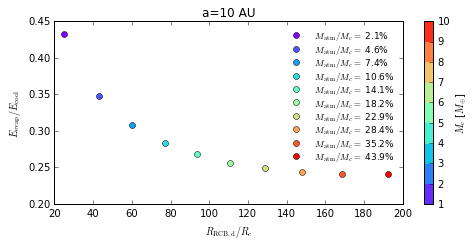

In [466]:
fig = plt.figure(figsize = (7, 3.5))

rnb = np.linspace(0, 256, nMco)
#Z = [[165,175],[0.15,0.19]]
x = np.linspace(20, 200, 100)
y = np.linspace(0.2, 0.45, 100)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)
levels = Mcore/Me
CS = plt.contourf(X, Y, Z, levels, cmap=get_cmap(cm.rainbow))


for i in range(nMco):
    plt.plot(rcboverrcv[i], ratiorcbv[i], 'o', c = cm.rainbow(int(rnb[i])), \
             label = r' $M_{\rm atm}/M_c=$ %.1f' % float(fracmv[i]) + '%')
plt.legend(frameon = False, loc = 1, labelspacing = 0.05, prop = {'size':9}, numpoints = 1)
    
cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')
plt.xlabel(r'$R_{\rm RCB,d}/R_c$')
plt.ylabel(r'$E_{\rm evap}/E_{\rm cool}$')


#plt.ylim(0.15, 0.19)
#plt.xlim(168, 175)
plt.title('a=10 AU')

plt.tight_layout()
#plt.savefig('../figs/evap_vs_cool_10au_rcb.pdf')

In [468]:
a = (ratiorcbv[0] - ratiorcbv[1]) / (rcboverrcv[0] * exponent - rcboverrcv[1] * exponent)
b = (ratiorcbv[1] * exponent * rcboverrcv[0] - ratiorcbv[0] * exponent * rcboverrcv[1]) / \
    (rcboverrcv[0] * exponent - rcboverrcv[1] * exponent)

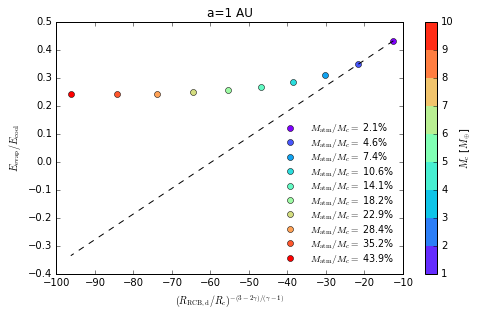

In [472]:
fig = plt.figure(figsize = (7, 4.5))

rnb = np.linspace(0, 256, nMco)
#Z = [[165,175],[0.15,0.19]]
x = np.linspace(-100, -10, 100)
y = np.linspace(-0.4, 0.5, 100)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)
levels = Mcore/Me
CS = plt.contourf(X, Y, Z, levels, cmap=get_cmap(cm.rainbow))


for i in range(nMco):
    plt.plot(rcboverrcv[i] * exponent, ratiorcbv[i], 'o', c = cm.rainbow(int(rnb[i])), \
             label = r' $M_{\rm atm}/M_c=$ %.1f' % float(fracmv[i]) + '%')
plt.plot(rcboverrcv * exponent, a * rcboverrcv * exponent + b, c = 'black', ls = '--')
plt.legend(frameon = False, loc = 4, labelspacing = 0.05, prop = {'size':9.5}, numpoints = 1)

    
cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')
plt.xlabel(r'$(R_{\rm RCB,d}/R_c)^{-(3-2\gamma)/(\gamma-1)}$')
plt.ylabel(r'$E_{\rm evap}/E_{\rm cool}$')

#plt.xlim(168.5, 175)
#plt.ylim(-0.097, -0.077)
plt.title('a=1 AU')

plt.tight_layout()
plt.savefig('../figs/evap_vs_cool_10au_analytic_comp_rcb.pdf')


In [484]:
a = 0.1

delad = 2./7
gamma = gammafn(delad)
R = Rfn(Y)
Cv = Cvfn(Y, delad)
Pd = Pdisk(a, mstar, FSigma, FT)
Td = 1e3 #Tdisk(a, FT)
nMco = 1

Mcore = numpy.linspace(10*Me, 10*Me, nMco) 
rcore = (3 * Mcore / (4 * numpy.pi * rhoc))**(1./3)

ratiov, ratiorcbv, RBoverrcv, rcboverrcv, fracmv, fracmrcbv, MBv, RBv = [], [], [], [], [], [], [], []

for i in range(nMco):
    prms = params(Mcore[i], rcore[i], a, delad, Y, gamma, R, Cv, Pd, Td,\
            kappa = kdust)
    model, param, prof = atmSG.atmload('a01Mc' + str(int(Mcore[i]/Me)), prms)
    dt = cool.cooling_global(param, prof, model, out='rcb')[1]
        
    time = []
    
    for i in range(len(dt)):
        time = np.append(time, sum(dt[:i + 1]))
        
    f = interp1d(time / yr, param.MB[:-1])
    MBd = float(f(3e6))
    
    fMrcb = interp1d(param.MB, param.Mcb)
    Mrcbd = float(fMrcb(MBd))
    
    frcb = interp1d(param.MB, param.rcb)
    rcbd = float(frcb(MBd))

    fRB = interp1d(param.MB, param.RB)
    RBd = float(fRB(MBd))
    
    fEtotB = interp1d(param.MB, param.EtotB)
    EtotBd = float(fEtotB(MBd))
    
    Eevap = - G * model.Mco * (MBd * Me - model.Mco) / (RBd * Re)
    Eevaprcb = - G * model.Mco * (Mrcbd * Me - model.Mco) / (rcbd * Re)
    
    ratio = Eevap / EtotBd
    ratiorcb = Eevaprcb / EtotBd
    RBoverrc = RBd*Re/model.rco
    rcboverrc = rcbd*Re/model.rco
    fracm = (MBd*Me/model.Mco - 1)*100
    fracmrcb = (Mrcbd*Me/model.Mco - 1)*100
    
    ratiov = np.append(ratiov, ratio)
    ratiorcbv = np.append(ratiorcbv, ratiorcb)
    RBoverrcv = np.append(RBoverrcv, RBoverrc)
    rcboverrcv = np.append(rcboverrcv, rcboverrc)
    fracmv = np.append(fracmv, fracm)
    fracmrcbv = np.append(fracmrcbv, fracmrcb)
    MBv = np.append(MBv, MBd)
    RBv = np.append(RBv, RBd)
    
    
    


In [485]:
ratiorcbv, rcboverrcv, RBoverrcv, fracmrcbv, fracmv

(array([ 0.86516437]),
 array([ 11.91712271]),
 array([ 16.79155603]),
 array([ 0.59791922]),
 array([ 0.72931352]))

In [502]:
ratiorcbv, rcboverrcv, RBoverrcv, fracmrcbv, fracmv

(array([ 0.86933567]),
 array([ 10.22424546]),
 array([ 16.75093437]),
 array([ 0.70620944]),
 array([ 0.90228295]))

In [541]:
a = 1

delad = 2./7
gamma = gammafn(delad)
R = Rfn(Y)
Cv = Cvfn(Y, delad)
Pd = Pdisk(a, mstar, FSigma, FT)
Td = Tdisk(a, FT)
nMco = 9

Mcore = numpy.linspace(2*Me, 10*Me, nMco) 
rcore = (3 * Mcore / (4 * numpy.pi * rhoc))**(1./3)

MBf, MBmax = [], []
L = 0 * np.ndarray(shape = (nMco, 300), dtype = float)
time = 0 * np.ndarray(shape = (nMco, 300), dtype = float)

for i in range(nMco):
    prms = params(Mcore[i], rcore[i], a, delad, Y, gamma, R, Cv, Pd, Td,\
            kappa = kdust)
    model2, param2, prof2, time2 = evap2.mass_loss('a1Mc' + str(int(Mcore[i]/Me)), prms)
    MBf = np.append(MBf, param2.MB[-1])
    MBmax = np.append(MBmax, param2.MB.max())
    for j in range(len(param2)):
        L[i, j] = param2.L[j]
        time[i, j] = time2[j]

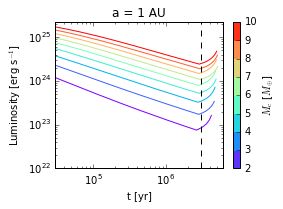

In [542]:
fig = plt.figure(figsize = (4, 3))

rnb = np.linspace(0, 256, nMco)
Z = [[0,0],[0,0]]
levels = Mcore/Me
CS = plt.contourf(Z, levels, cmap=get_cmap(cm.rainbow))

for i in range(nMco):
    plt.loglog(time[i] / yr, L[i], c = cm.rainbow(int(rnb[i])))
plt.ylim(ymin = 1e22)
plt.xlim(xmin = 3e4, xmax = 6e6)
plt.xlabel('t [yr]')
plt.ylabel(r'Luminosity [erg s$^{-1}$]')
plt.title(r'a = 1 AU')
plt.axvline(x = 3e6, c = 'black', ls = '--')

cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')

plt.tight_layout()
plt.savefig('../figs/L_vs_t_num_1AU.pdf')

In [543]:
a = 10

delad = 2./7
gamma = gammafn(delad)
R = Rfn(Y)
Cv = Cvfn(Y, delad)
Pd = Pdisk(a, mstar, FSigma, FT)
Td = Tdisk(a, FT)
nMco = 10

Mcore = numpy.linspace(1*Me, 10*Me, nMco) 
rcore = (3 * Mcore / (4 * numpy.pi * rhoc))**(1./3)

MBf, MBmax = [], []
L = 0 * np.ndarray(shape = (nMco, 300), dtype = float)
time = 0 * np.ndarray(shape = (nMco, 300), dtype = float)

for i in range(nMco):
    prms = params(Mcore[i], rcore[i], a, delad, Y, gamma, R, Cv, Pd, Td,\
            kappa = kdust)
    model2, param2, prof2, time2 = evap2.mass_loss('a10Mc' + str(int(Mcore[i]/Me)), prms)
    MBf = np.append(MBf, param2.MB[-1])
    MBmax = np.append(MBmax, param2.MB.max())
    for j in range(len(param2)):
        L[i, j] = param2.L[j]
        time[i, j] = time2[j]

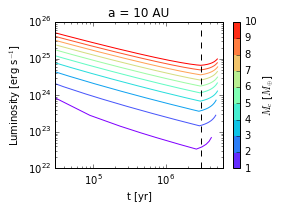

In [544]:
fig = plt.figure(figsize = (4, 3))

rnb = np.linspace(0, 256, nMco)
Z = [[0,0],[0,0]]
levels = Mcore/Me
CS = plt.contourf(Z, levels, cmap=get_cmap(cm.rainbow))

for i in range(nMco):
    plt.loglog(time[i] / yr, L[i], c = cm.rainbow(int(rnb[i])))
plt.ylim(ymin = 1e22, ymax = 1e26)
plt.xlim(xmin = 3e4, xmax = 6e6)
plt.xlabel('t [yr]')
plt.ylabel(r'Luminosity [erg s$^{-1}$]')
plt.title(r'a = 10 AU')
plt.axvline(x = 3e6, c = 'black', ls = '--')

cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')

plt.tight_layout()
plt.savefig('../figs/L_vs_t_num_10AU.pdf')

In [398]:
f = interp1d(time / yr, param.Mtot[1:])
f(3e6)
print param.Mtot[42], time[42]/yr

11.8609049275 4687685.73493


In [402]:
print - G * model.Mco * (param.Mtot[42] * Me - model.Mco) / (param.rcb[42] * Re) + \
    model.Cv * param.Tcb[42] * param.Mtot[42], param.Etotout[42]

[ -1.37460759e+39] -5.48028950584e+39


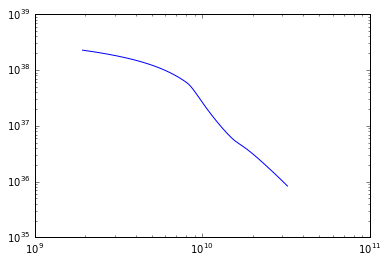

In [389]:
plt.loglog(prof2.r[39], - (- G * prof2.m[39] / prof2.r[39] + model2.Cv * prof2.t[39]) * \
           prof2.rho[39] * prof2.r[39]**3)

In [64]:
len(param.Mtot)

100

In [24]:
paramSG.Mtot, paramSG.MB, paramSG.L

(array([ 11.        ,  11.18585438,  11.37484892,  11.56703669,
         11.76247163,  11.96120862,  12.16330343,  12.36881281,
         12.57779445,  12.79030701,  13.00641015,  13.22616453,
         13.44963186,  13.67687485,  13.90795731,  14.14294411,
         14.3819012 ,  14.62489568,  14.87199576,  15.12327081,
         15.37879136,  15.63862915,  15.90285712,  16.17154944,
         16.44478156,  16.72263016,  17.00517325,  17.29249015,
         17.58466151,  17.88176935,  18.18389709,  18.49112953,
         18.80355293,  19.12125498,  19.44432488,  19.77285333,
         20.10693254,  20.4466563 ,  20.79211999,  21.14342058,
         21.50065669,  21.86392862,  22.23333833,  22.60898953,
         22.99098768,  23.37944001,  23.77445558,  24.17614528,
         24.58462186,  25.        ]),
 array([ 10.81620172,  10.99895467,  11.18480262,  11.37379979,
         11.5659973 ,  11.7614526 ,  11.96022002,  12.16235464,
         12.36791865,  12.57696619,  12.7895587 ,  13.00575832,
  

In [104]:
param.rcb/param.rout

array([ 1.        ,  0.84175503,  0.7910481 ,  0.75184106,  0.72269517,
        0.69861394,  0.67533513,  0.66024847,  0.64186321,  0.6275243 ,
        0.61350571,  0.5998003 ,  0.58972254,  0.57654842,  0.56686134,
        0.55733701,  0.54797271,  0.54181742,  0.53271388,  0.52376329,
        0.51787994,  0.5091786 ,  0.50345907,  0.49500002,  0.48943976,
        0.48394196,  0.47850592,  0.47313094,  0.46518146,  0.45995615,
        0.45478953,  0.44968095,  0.44462975,  0.4396353 ,  0.43715915,
        0.43224861,  0.42739323,  0.42259238,  0.41784547,  0.41315188,
        0.41082489,  0.40621016,  0.40164726,  0.39938507,  0.39489884,
        0.390463  ,  0.3882638 ,  0.3839025 ,  0.38174025,  0.37745222,
        0.37321236,  0.37111032,  0.3669417 ,  0.36487498,  0.36077639,
        0.3587444 ,  0.35471468,  0.35271682,  0.35073022,  0.34679053,
        0.3448373 ,  0.3409638 ,  0.33904339,  0.33713381,  0.33334683,
        0.33146933,  0.3296024 ,  0.32590003,  0.32406447,  0.32

In [6]:
param.L/paramSG.L

array([  1.81872211,   6.33708082,  10.65587465,  14.37848682,
        17.45158886,  19.90565629,  21.79822431,  23.19422257,
        24.15807494,  24.75040487,  25.02669364,  25.03688906,
        24.82545246,  24.43164654,  23.88990856,  23.23026614,
        22.47876715,  21.65787422,  20.78689036,  19.88218048,
        18.95774512,  18.02527525,  17.0945288 ,  16.17361801,
        15.26906963,  14.38621919,  13.52924001,  12.70135113,
        11.90494338,  11.14170974,  10.41273449,   9.71861252,
         9.05951028,   8.43523851,   7.84532976,   7.28907978,
         6.76560129,   6.27385693,   5.81270924,   5.38093881,
         4.97726449,   4.60037801,   4.24895926,   3.92168277,
         3.61723882,   3.33433742,   3.07172557,   2.82817442,
         2.60251226,   2.39360496,   2.20035898,   2.02174761,
         1.85677979,   1.70452013,   1.56408478,   1.43463962,
         1.31538937,   1.20560124,   1.10457897,   1.01167137,
         0.92626956,   0.84780471,   0.77574795,   0.70

In [20]:
print timeSG/yr, time/yr

[  9.40333267e+06   4.45619049e+07   1.08509343e+08   2.02534952e+08
   3.26802525e+08   4.80742251e+08   6.63294567e+08   8.73069699e+08
   1.10844661e+09   1.36765576e+09   1.64882926e+09   1.95005196e+09
   2.26938107e+09   2.60487112e+09   2.95462368e+09   3.31674633e+09
   3.68940054e+09   4.07080781e+09   4.45924834e+09   4.85306726e+09
   5.25067455e+09   5.65054664e+09   6.05123675e+09   6.45140682e+09
   6.84973525e+09   7.24498140e+09   7.63602478e+09   8.02174107e+09
   8.40114719e+09   8.77326047e+09   9.13722055e+09   9.49216614e+09
   9.83738563e+09   1.01721118e+10   1.04957643e+10   1.08077007e+10
   1.11073730e+10   1.13943391e+10   1.16680894e+10   1.19282732e+10
   1.21745342e+10   1.24065032e+10   1.26239517e+10   1.28266446e+10
   1.30143282e+10   1.31868622e+10   1.33441510e+10   1.34860300e+10
   1.36123955e+10   1.37233095e+10   1.38186970e+10   1.38985044e+10
   1.39627880e+10   1.40116193e+10   1.40450151e+10   1.40630112e+10
   1.40657850e+10   1.40534618e+10